In [1]:
import os.path as path_

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_path = 'data'
submit_path = 'submits'
seed = 110894

In [4]:
df_first_group_sku = pd.read_csv(path_.join(data_path, 'first_group_sku.csv'))
df_first_group_sku.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   dates          245 non-null    object 
 1   SKU            245 non-null    int64  
 2   price_per_sku  169 non-null    float64
 3   num_purchases  245 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 7.8+ KB


In [5]:
df_first_group_sku['dates'] = pd.to_datetime(df_first_group_sku['dates'])

In [6]:
df_first_group_sku['SKU'].nunique(), df_first_group_sku['SKU'].unique()

(2, array([32950, 78833]))

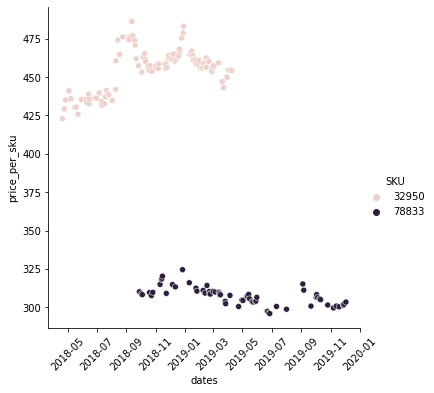

In [6]:
_ = sns.relplot(x='dates', y='price_per_sku', hue='SKU', data=df_first_group_sku)
_ = plt.xticks(rotation=45)

In [7]:
(
    df_first_group_sku
    .groupby('SKU', as_index=False)
    .agg({'price_per_sku': lambda x: x.isna().sum()})
    .astype({'price_per_sku': np.int64})
    .rename(columns={'price_per_sku': 'nulls_count'})
    .to_csv(
        path_.join(submit_path, 'first_sku_price_missings.csv'),
        index=False,
    )
)

In [8]:
df_first_group_sku['SKU'].unique()

array([32950, 78833])

In [9]:
df_first_group_sku.groupby('SKU').agg({'dates': ['min', 'max']})

dates           
             min        max
SKU                        
32950 2018-04-20 2019-04-09
78833 2018-09-28 2019-12-03

In [10]:
mask = df_first_group_sku['SKU'] == 32950
df_first_group_sku.loc[mask, 'price_per_sku'] = df_first_group_sku.loc[mask, 'price_per_sku'].fillna(method='ffill')

In [11]:
mask = df_first_group_sku['SKU'] == 78833
df_first_group_sku.loc[mask, 'price_per_sku'] = df_first_group_sku.loc[mask, 'price_per_sku'].fillna(method='ffill')

In [12]:
df_first_group_sku['price_per_sku'].isna().sum()

0

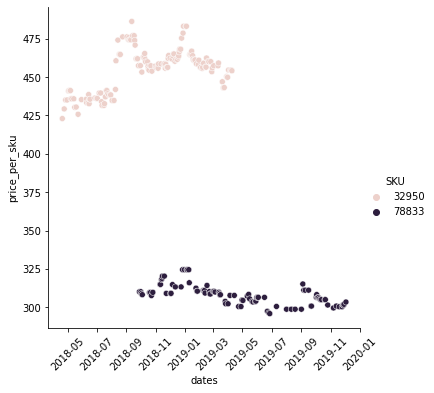

In [13]:
_ = sns.relplot(x='dates', y='price_per_sku', hue='SKU', data=df_first_group_sku)
_ = plt.xticks(rotation=45)

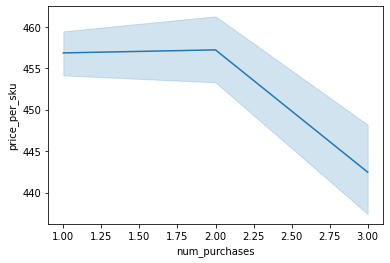

In [14]:
sns.lineplot(
    x='num_purchases',
    y='price_per_sku',
    data=df_first_group_sku[df_first_group_sku['SKU'] == 32950]
)

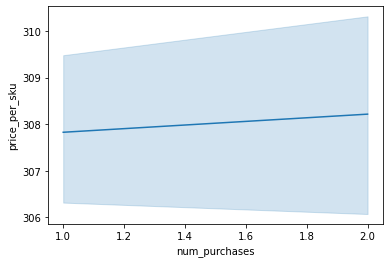

In [15]:
sns.lineplot(
    x='num_purchases',
    y='price_per_sku',
    data=df_first_group_sku[df_first_group_sku['SKU'] == 78833]
)